In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
df = pd.read_csv('../01_Data/data_california_house.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0  


In [62]:
# Informasi dasar tentang dataset
print('')
print('----------------------------------------------------------------------------------------------------')
print(df.info())

# Statistik deskriptif
print('')
print('----------------------------------------------------------------------------------------------------')
print(df.describe())

# Cek missing values
print('')
print('----------------------------------------------------------------------------------------------------')
print(df.isnull().sum())

# Cek duplikat
print('')
print('----------------------------------------------------------------------------------------------------')
print(f"Jumlah data duplikat: {df.duplicated().sum()}")


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB
None

----------------------------------------------------------------------------------------------------
          longitude      latitude  housing

In [63]:
# Untuk kolom total_bedrooms yang memiliki missing values
# Kita bisa isi dengan median berdasarkan kelompok rumah dengan jumlah kamar yang sama
df['total_bedrooms'] = df.groupby('total_rooms')['total_bedrooms'].transform(lambda x: x.fillna(x.median()))

# Jika masih ada missing values, isi dengan median keseluruhan
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

d:\PurwadhikaBackup\capstoneproject\modultiga\california_housing_price_prediction\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\PurwadhikaBackup\capstoneproject\modultiga\california_housing_price_prediction\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\PurwadhikaBackup\capstoneproject\modultiga\california_housing_price_prediction\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\PurwadhikaBackup\capstoneproject\modultiga\california_housing_price_prediction\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
d:\PurwadhikaBackup\capstoneproject\modultiga\california

4. Analisis Univariate

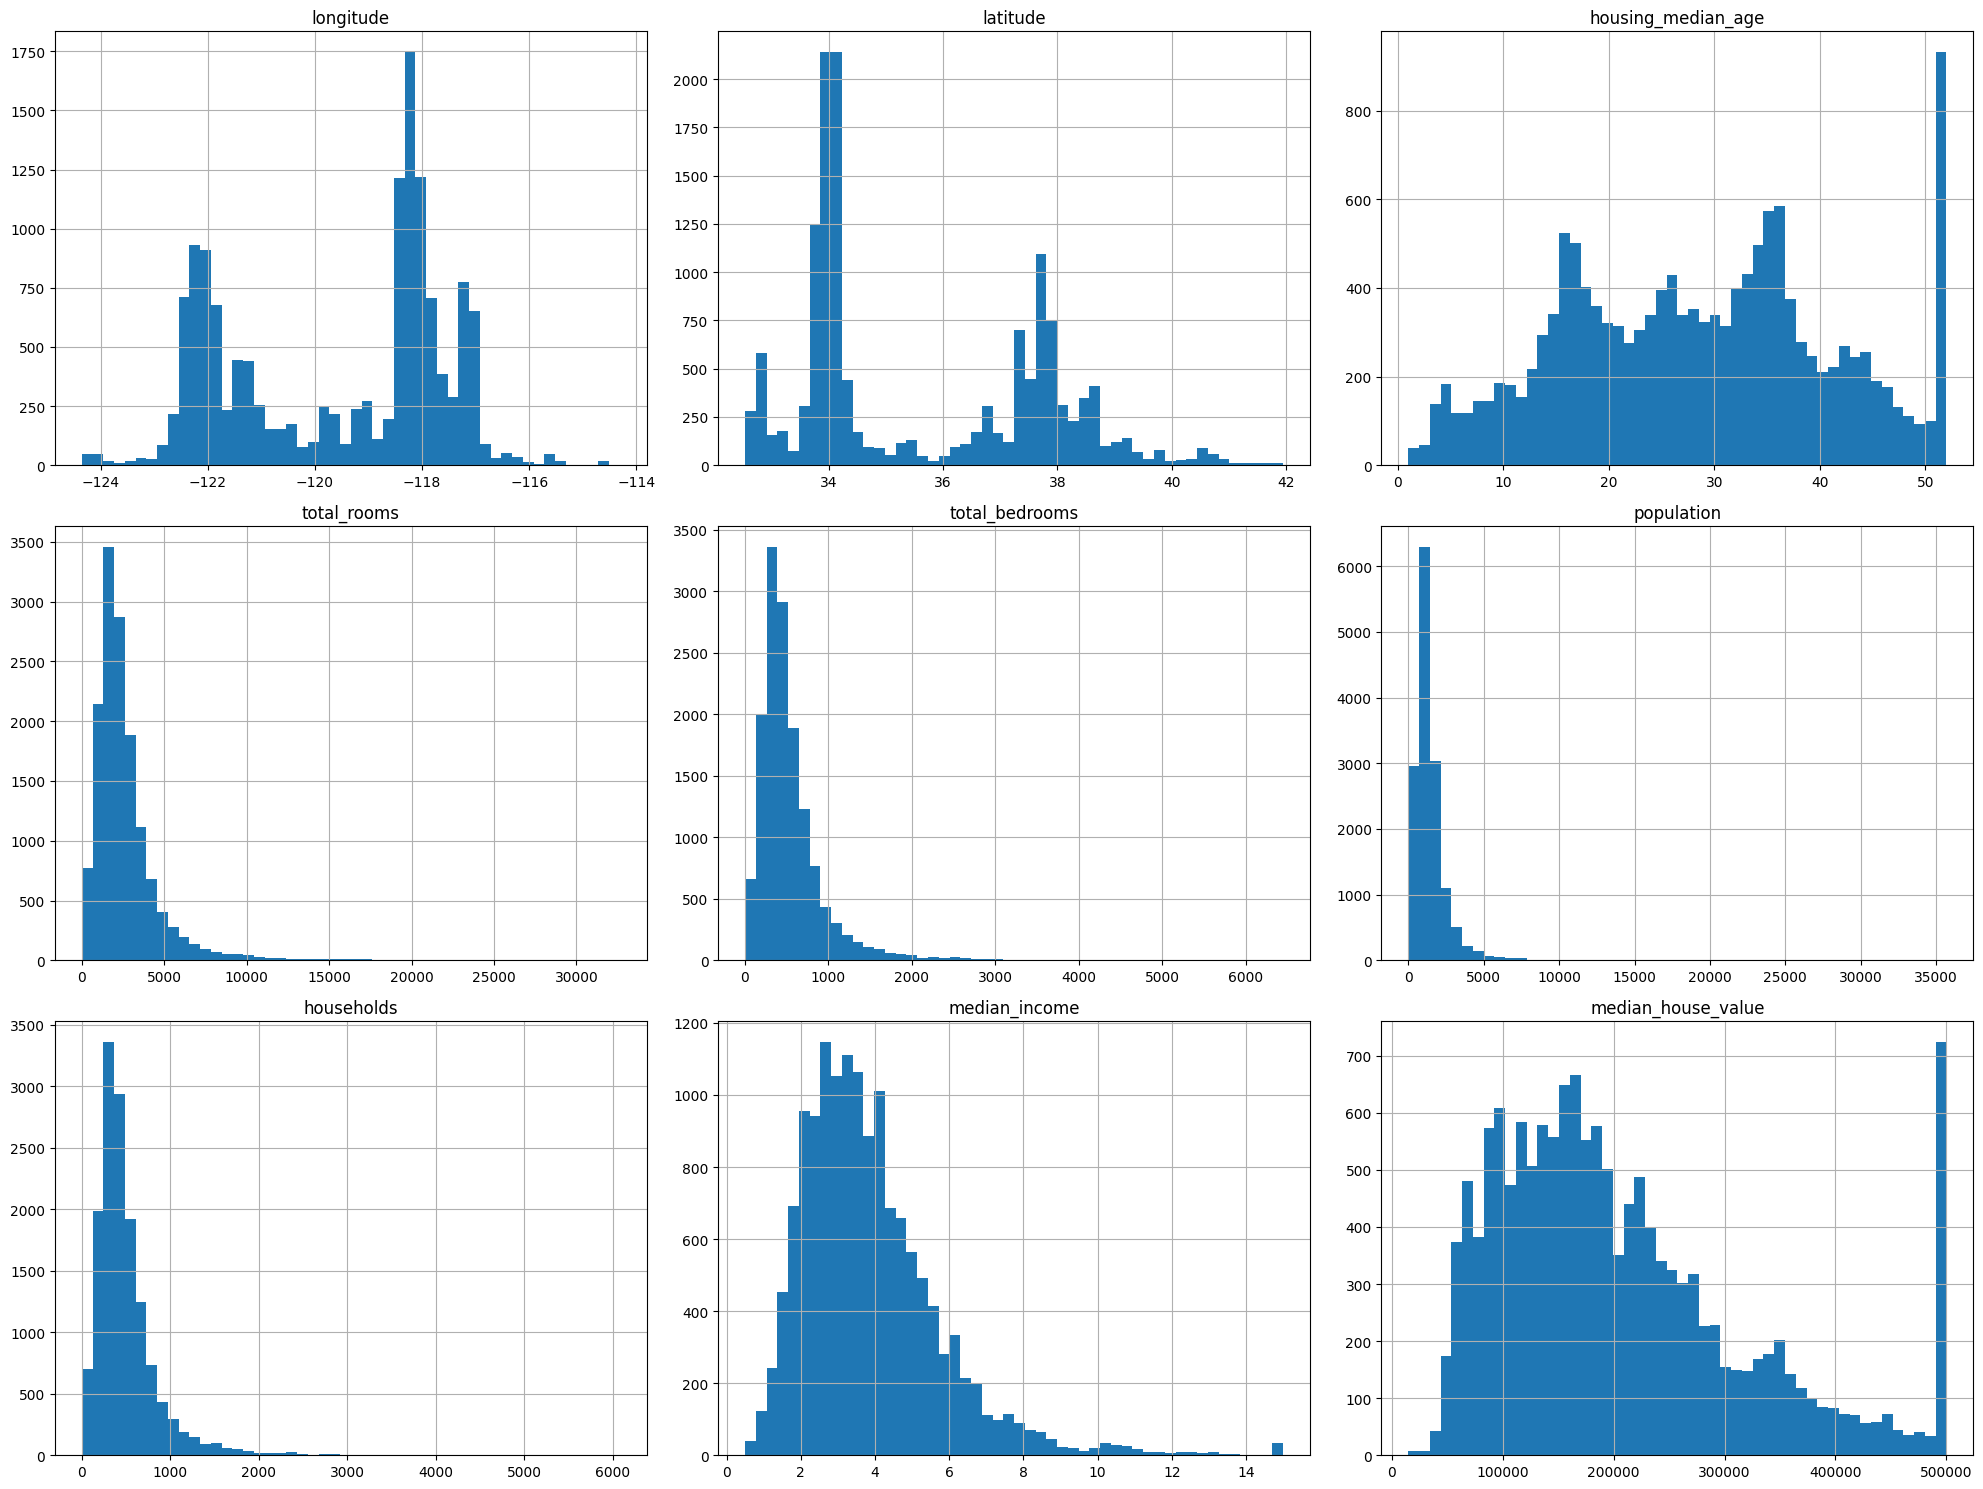

In [64]:
# Plot distribusi untuk semua variabel numerik
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

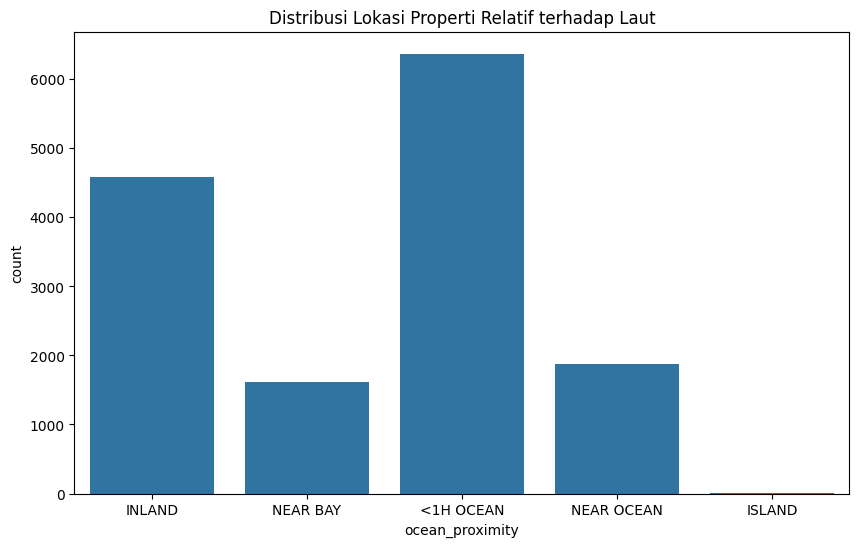

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64


In [65]:
# Analisis variabel kategorik
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ocean_proximity')
plt.title('Distribusi Lokasi Properti Relatif terhadap Laut')
plt.show()

# Frekuensi masing-masing kategori
print(df['ocean_proximity'].value_counts())

5. Analisis Bivariate

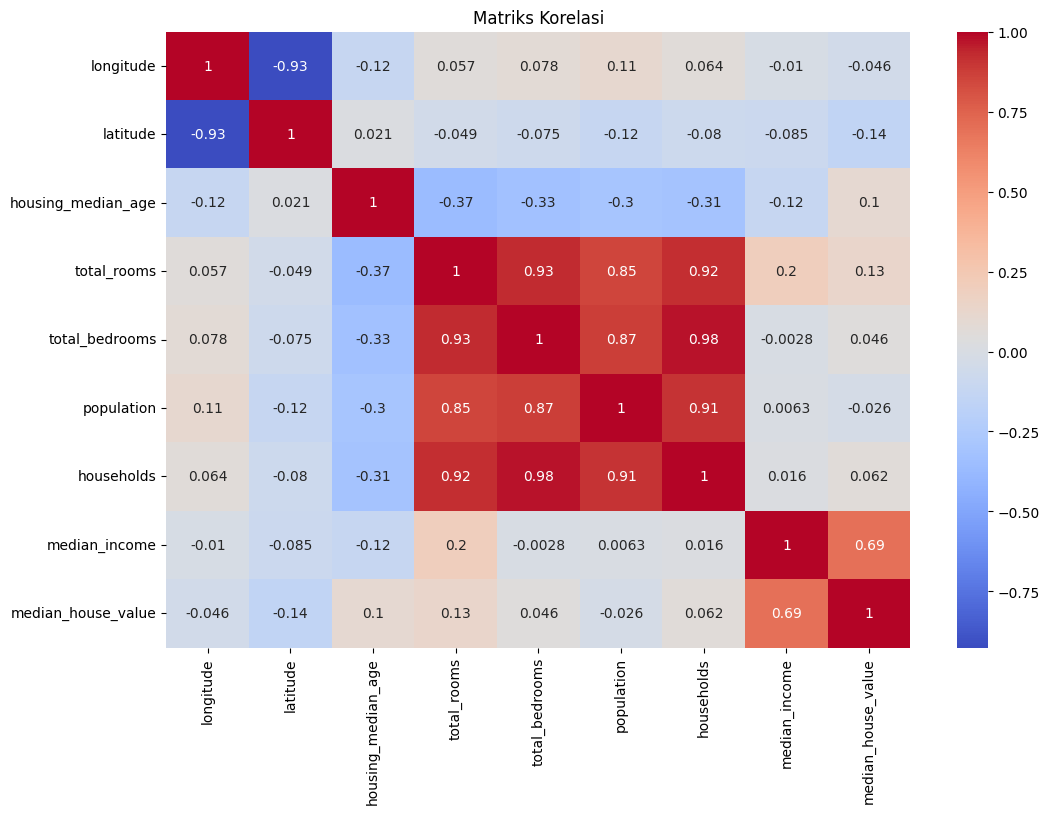

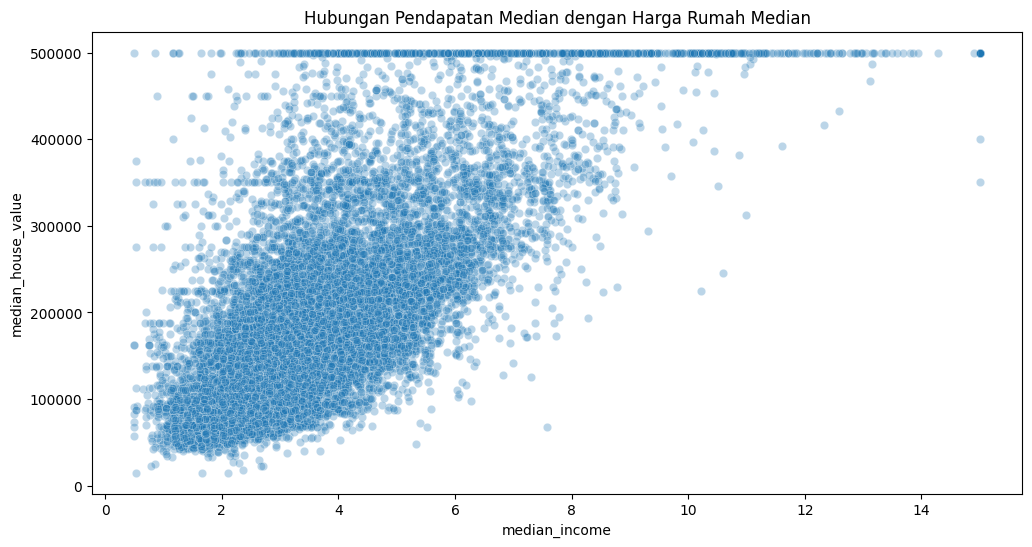

In [66]:
# Hanya ambil kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriks korelasi
corr_matrix = numeric_df.corr()

# Korelasi antara variabel numerik
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Scatter plot fitur penting vs target
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.3)
plt.title('Hubungan Pendapatan Median dengan Harga Rumah Median')
plt.show()

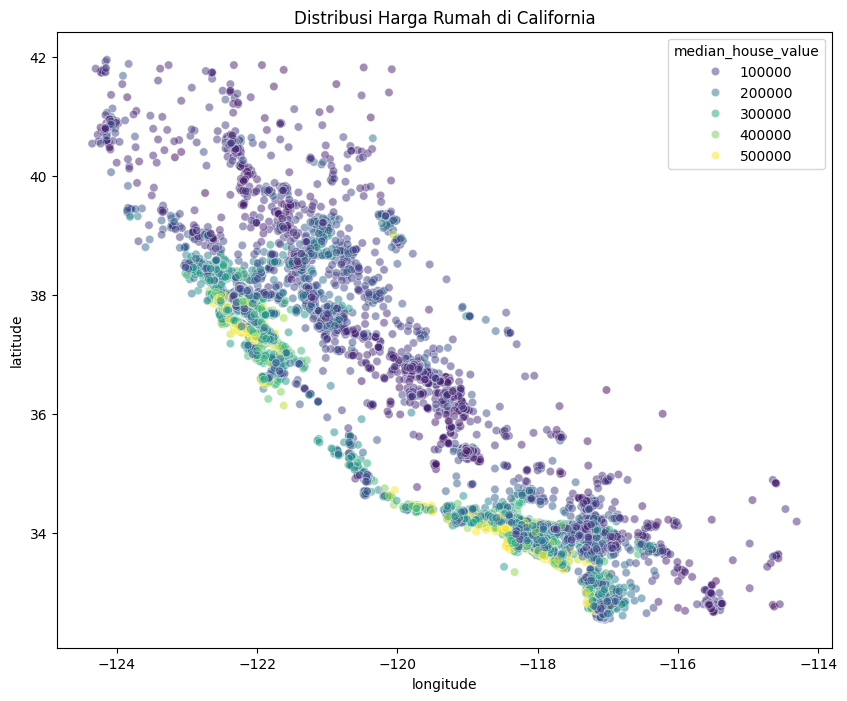

In [67]:
# Visualisasi geografis harga rumah
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='longitude', y='latitude', 
                hue='median_house_value', palette='viridis', alpha=0.5)
plt.title('Distribusi Harga Rumah di California')
plt.show()

In [68]:
# df_after = pd.read_csv('../01_Data/data_california_house_cleaned.csv')